# Geometry tools: example usage

First, import the relevant packages. The `hyperbolic` package handles the computations in hyperbolic space, while the `drawtools` package provides a bunch of convenient tools for drawing pictures in the hyperbolic plane.

In [2]:
from geometry_tools import hyperbolic, drawtools

We create an object to represent a copy of hyperbolic space. Every hyperbolic object we create lives in this copy of H^2.

In [3]:
plane = hyperbolic.HyperbolicPlane()

# this is equivalent to: 
# plane = hyperbolic.HyperbolicSpace(2)

We can do some basic coordinate transformations in the different models.

In [4]:
point = plane.get_point((0., 0.1), model="klein")

point.coords("poincare"), point.coords("halfplane")

(array([0.        , 0.05012563]), array([-0.1       ,  0.99498744]))

In [5]:
# we can also construct the point directly:
point2 = hyperbolic.Point(plane, (0.1, 0.3), model="klein")

point2.coords("projective"), point.coords("hyperboloid")

(array([1. , 0.1, 0.3]), array([1.00503782, 0.        , 0.10050378]))

## Using drawtools to draw some points

This is based around a HyperbolicDrawing object

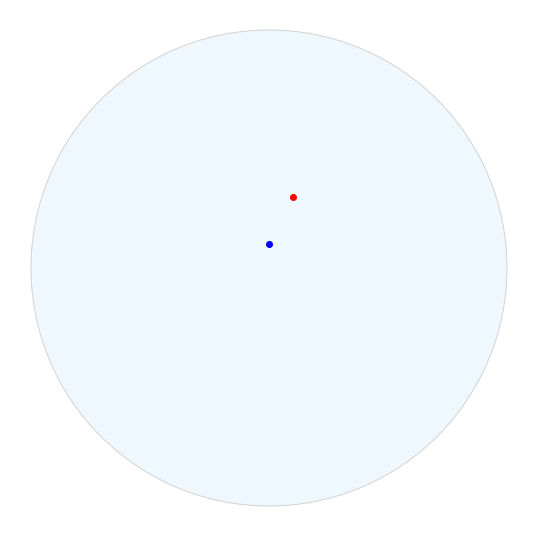

In [6]:
# supported drawing models are: Model.KLEIN, Model.POINCARE, and Model.HALFPLANE
figure = drawtools.HyperbolicDrawing(model="klein")

figure.draw_plane()
figure.draw_point(point, color="blue")
figure.draw_point(point2, color="red")

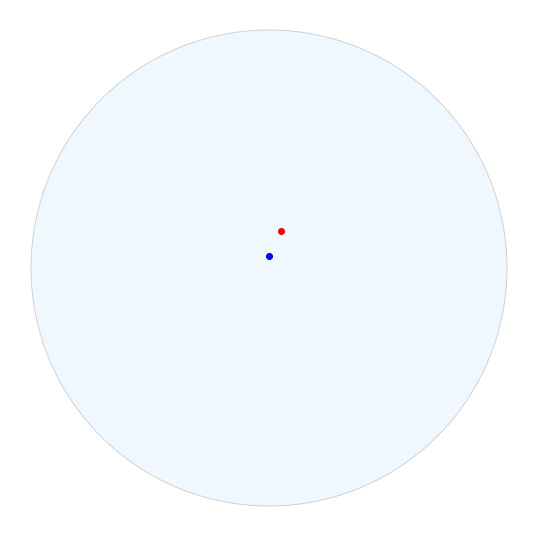

In [7]:
# and now in the poincare model:

figure = drawtools.HyperbolicDrawing(model="poincare")

figure.draw_plane()
figure.draw_point(point, color="blue")
figure.draw_point(point2, color="red")

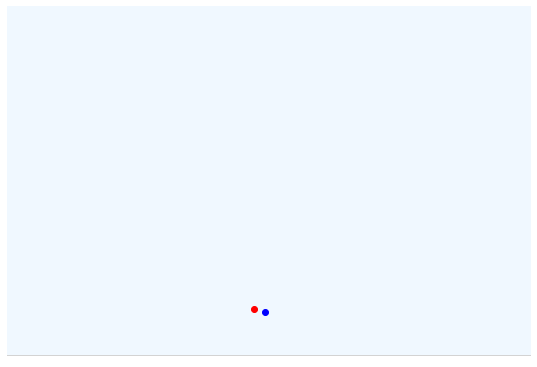

In [8]:
# and now in the poincare model:

figure = drawtools.HyperbolicDrawing(model="halfspace")

figure.draw_plane()
figure.draw_point(point, color="blue")
figure.draw_point(point2, color="red")

## Drawing segments and polygons

We can build segments and polygons using arrays of points.

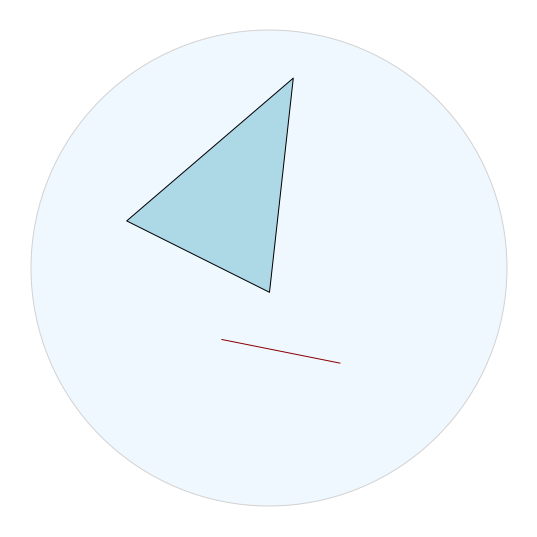

In [9]:
# first pick some points in Klein coordinates

p1 = plane.get_point((0.1, 0.8), model="klein")
p2 = plane.get_point((-0.6, 0.2), model="klein")
p3 = plane.get_point((0., -0.1), model="klein")

p4 = plane.get_point((-0.2, -0.3))
p5 = plane.get_point((0.3, -0.4))

# make a triangle and an arc out of these points
triangle = hyperbolic.Polygon(plane, [p1, p2, p3])
arc = hyperbolic.Segment(plane, [p4, p5])

# draw using drawtools
figure = drawtools.HyperbolicDrawing(model="klein")
figure.draw_plane()

figure.draw_polygon(triangle, facecolor="lightblue")
figure.draw_geodesic(arc, edgecolor="darkred")

And now the same figure, in Poincare and halfplane coordinates:

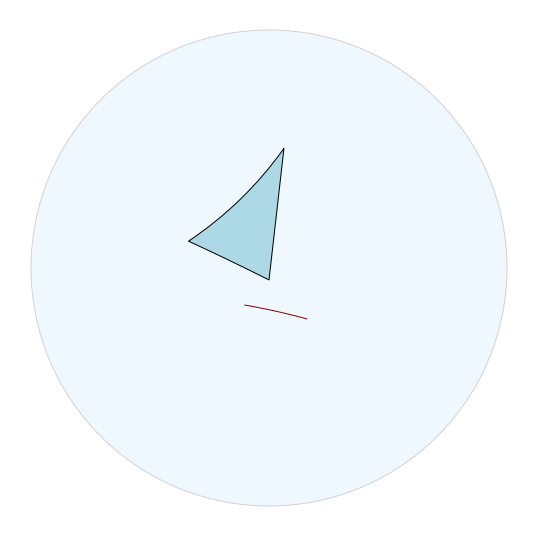

In [10]:
figure = drawtools.HyperbolicDrawing(model="poincare")
figure.draw_plane()

figure.draw_polygon(triangle, facecolor="lightblue")
figure.draw_geodesic(arc, edgecolor="darkred", linestyle="-")

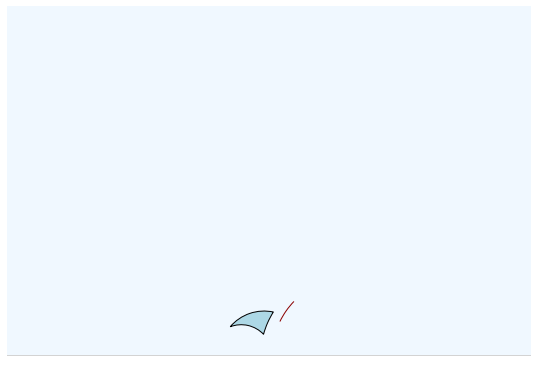

In [11]:
figure = drawtools.HyperbolicDrawing(model="halfplane")
figure.draw_plane()

figure.draw_polygon(triangle, facecolor="lightblue")
figure.draw_geodesic(arc, edgecolor="darkred")

## Translating by isometries

This is the main feature of geometry_tools: the ability to quickly translate around objects in hyperbolic space by an array of many isometries.

There are a handful of built-in ways to construct isometries, but for starters let's use the action of PSL(2, R).

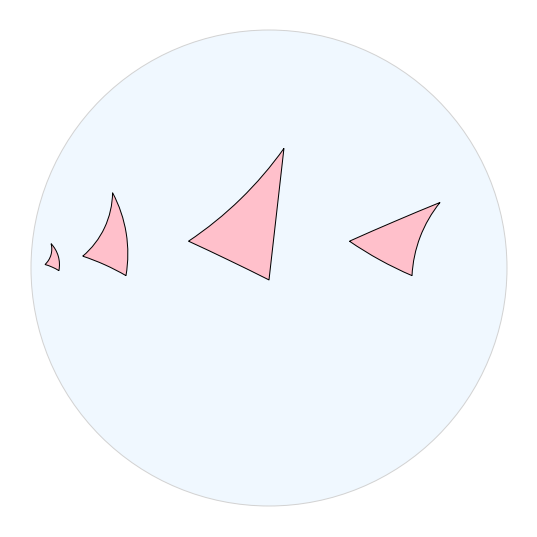

In [12]:
lox_param = 2.0

# make a loxodromic isometry
iso = plane.sl2r_iso([[lox_param, 0.], [0., 1 / lox_param]])

figure = drawtools.HyperbolicDrawing(model="poincare")
figure.draw_plane()

# draw 4 copies of the triangle, translated by this isometry
figure.draw_polygon(triangle, facecolor="pink")
figure.draw_polygon(iso @ triangle, facecolor="pink")
figure.draw_polygon(iso.inv() @ triangle, facecolor="pink")
figure.draw_polygon(iso @ iso @ triangle, facecolor="pink")

## Translating by free group orbits

To quickly build a lot of isometries, we can build a representation of a free group, and then translate by the images of group elements up to a given length.

In [13]:
# first we need pi!
import numpy as np
pi = np.pi

rep = hyperbolic.HyperbolicRepresentation(plane)

# we take the free group generated by a loxodromic isometry,
# and a conjugate of it with a perpendicular axis

param = 3.5

rot = plane.get_standard_rotation(pi / 2)
lox = plane.get_standard_loxodromic(param)

rep["a"] = lox
rep["b"] = rot @ lox @ rot.inv()

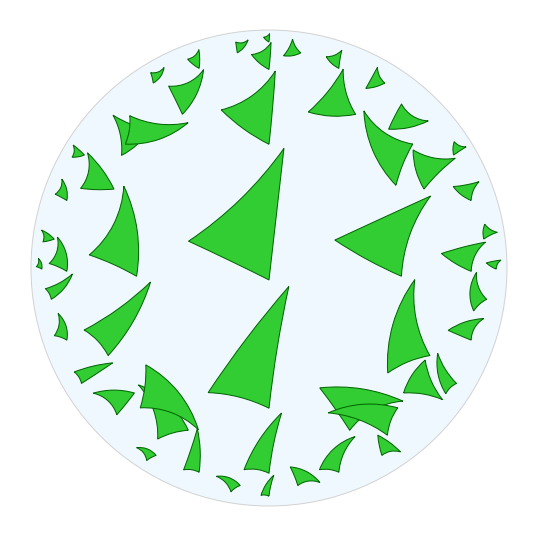

In [14]:
isometries = rep.isometries(rep.free_words_less_than(4))

figure = drawtools.HyperbolicDrawing(model="poincare")

figure.draw_plane()
figure.draw_polygon(isometries @ triangle, facecolor="limegreen", edgecolor="darkgreen", linewidth=1)